In [239]:
# Importing the necessarty modules
import pandas as pd # Handles DataFrame
import matplotlib.pyplot as plt #Plot Graphs
import seaborn as sns # Plotting Graphs
import numpy as np

# import func that allows us to do test-split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as IMBPipeline

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


# import func to perform model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,RocCurveDisplay
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    StratifiedKFold,
)

In [240]:
#Loading the data for Classification and analysing it
df= pd.read_csv('./CA1-Regression-Dataset.csv')
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


In [241]:
df.shape

(1338, 7)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [243]:
df.isna().sum()

ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

In [244]:
# For categorical data

print("Unique values for Region:",df['Region'].unique())

print('Unique values for Smoker:' ,df['Smoker'].unique())

print("Unique values for Gender:", df['Gender'].unique())

Unique values for Region: ['southwest' 'southeast' 'northwest' 'northeast']
Unique values for Smoker: ['yes' 'no']
Unique values for Gender: ['female' 'male']


In [245]:
df.describe()

,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


In [246]:
df_explore = df.copy()

Before plotting a heat map we will have to convert our categorical data into numeric data by creating dummy variables.

<Axes: xlabel='Gender', ylabel='Cost ($)'>

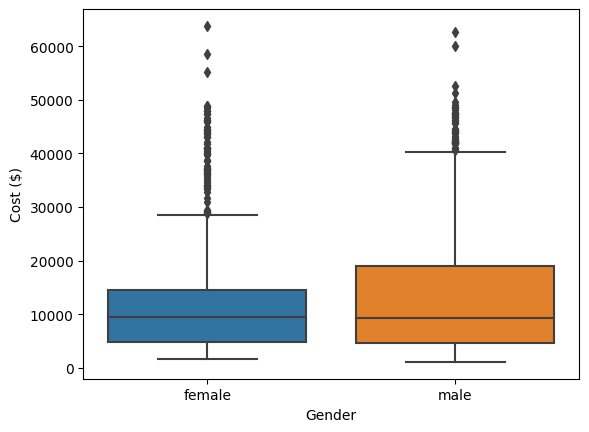

In [247]:
sns.boxplot(data = df_explore, y=df['Cost ($)'], x=df['Gender'])

In [248]:
enc = OneHotEncoder(drop='first')

cols = [
    'Gender',
    'Smoker'
]
for col in cols:
    enc.fit(df[[col]])

    df_encoded = pd.DataFrame(enc.transform(df[[col]]).toarray(), columns=enc.get_feature_names_out([col]))

    df_explore = pd.concat(
        [df_explore,
        df_encoded],
        axis=1
    )

df_explore_preprocessed = df_explore.drop(df[cols], axis = 1)

In [249]:
def createRegionDummy(df):
    df["dummy_North"] = df['Region'].apply(lambda x: 1 if x in ['northeast', 'northwest'] else 0)
    df["dummy_East"] = df['Region'].apply(lambda x: 1 if x in ['northeast', 'southeast'] else 0)
    df.drop(df[['Region']], axis=1, inplace=True)
    return df

df_explore_preprocessed2 = createRegionDummy(df_explore_preprocessed)

df_explore_preprocessed2


,ID,Age,BMI,Cost ($),Gender_male,Smoker_yes,dummy_North,dummy_East
0,1,19,27.900,16884.92400,0.0,1.0,0,0
1,2,18,33.770,1725.55230,1.0,0.0,0,1
2,3,28,33.000,4449.46200,1.0,0.0,0,1
3,4,33,22.705,21984.47061,1.0,0.0,1,0
4,5,32,28.880,3866.85520,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...
1333,1334,50,30.970,10600.54830,1.0,0.0,1,0
1334,1335,18,31.920,2205.98080,0.0,0.0,1,1
1335,1336,18,36.850,1629.83350,0.0,0.0,0,1
1336,1337,21,25.800,2007.94500,0.0,0.0,0,0


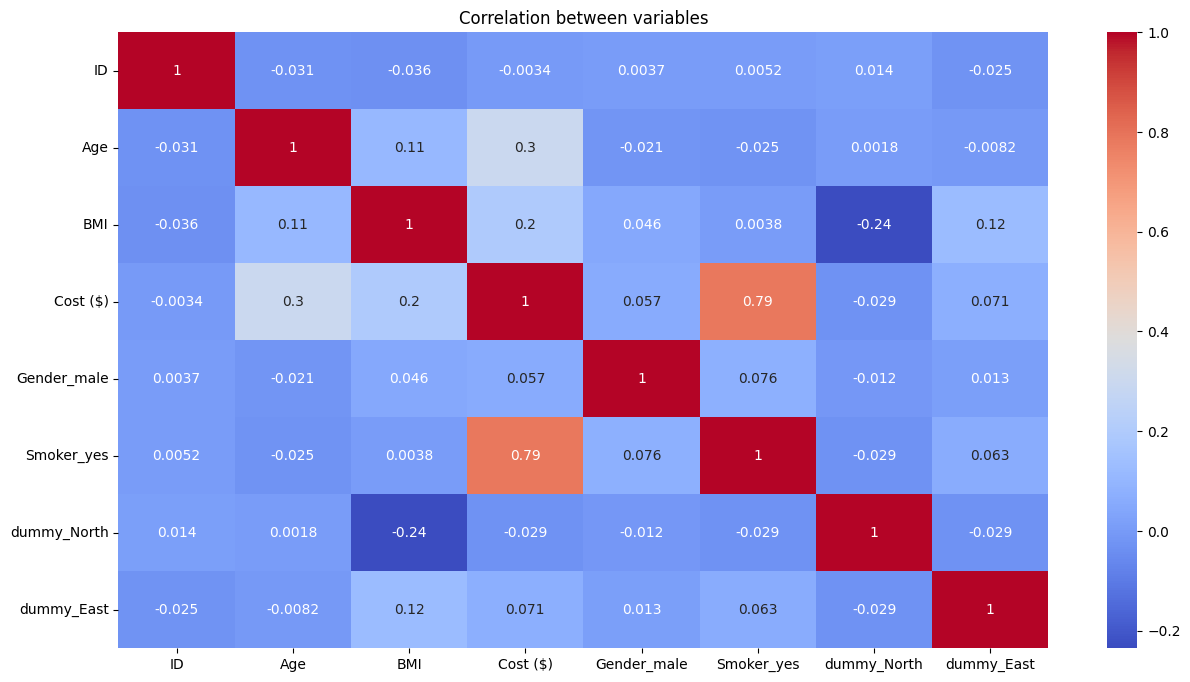

In [251]:
plt.figure(figsize=(15, 8))

# Plot
sns.heatmap(df_explore_preprocessed2.corr(), annot=True, cmap='coolwarm').set(title="Correlation between variables")

# Show Plot
plt.show()


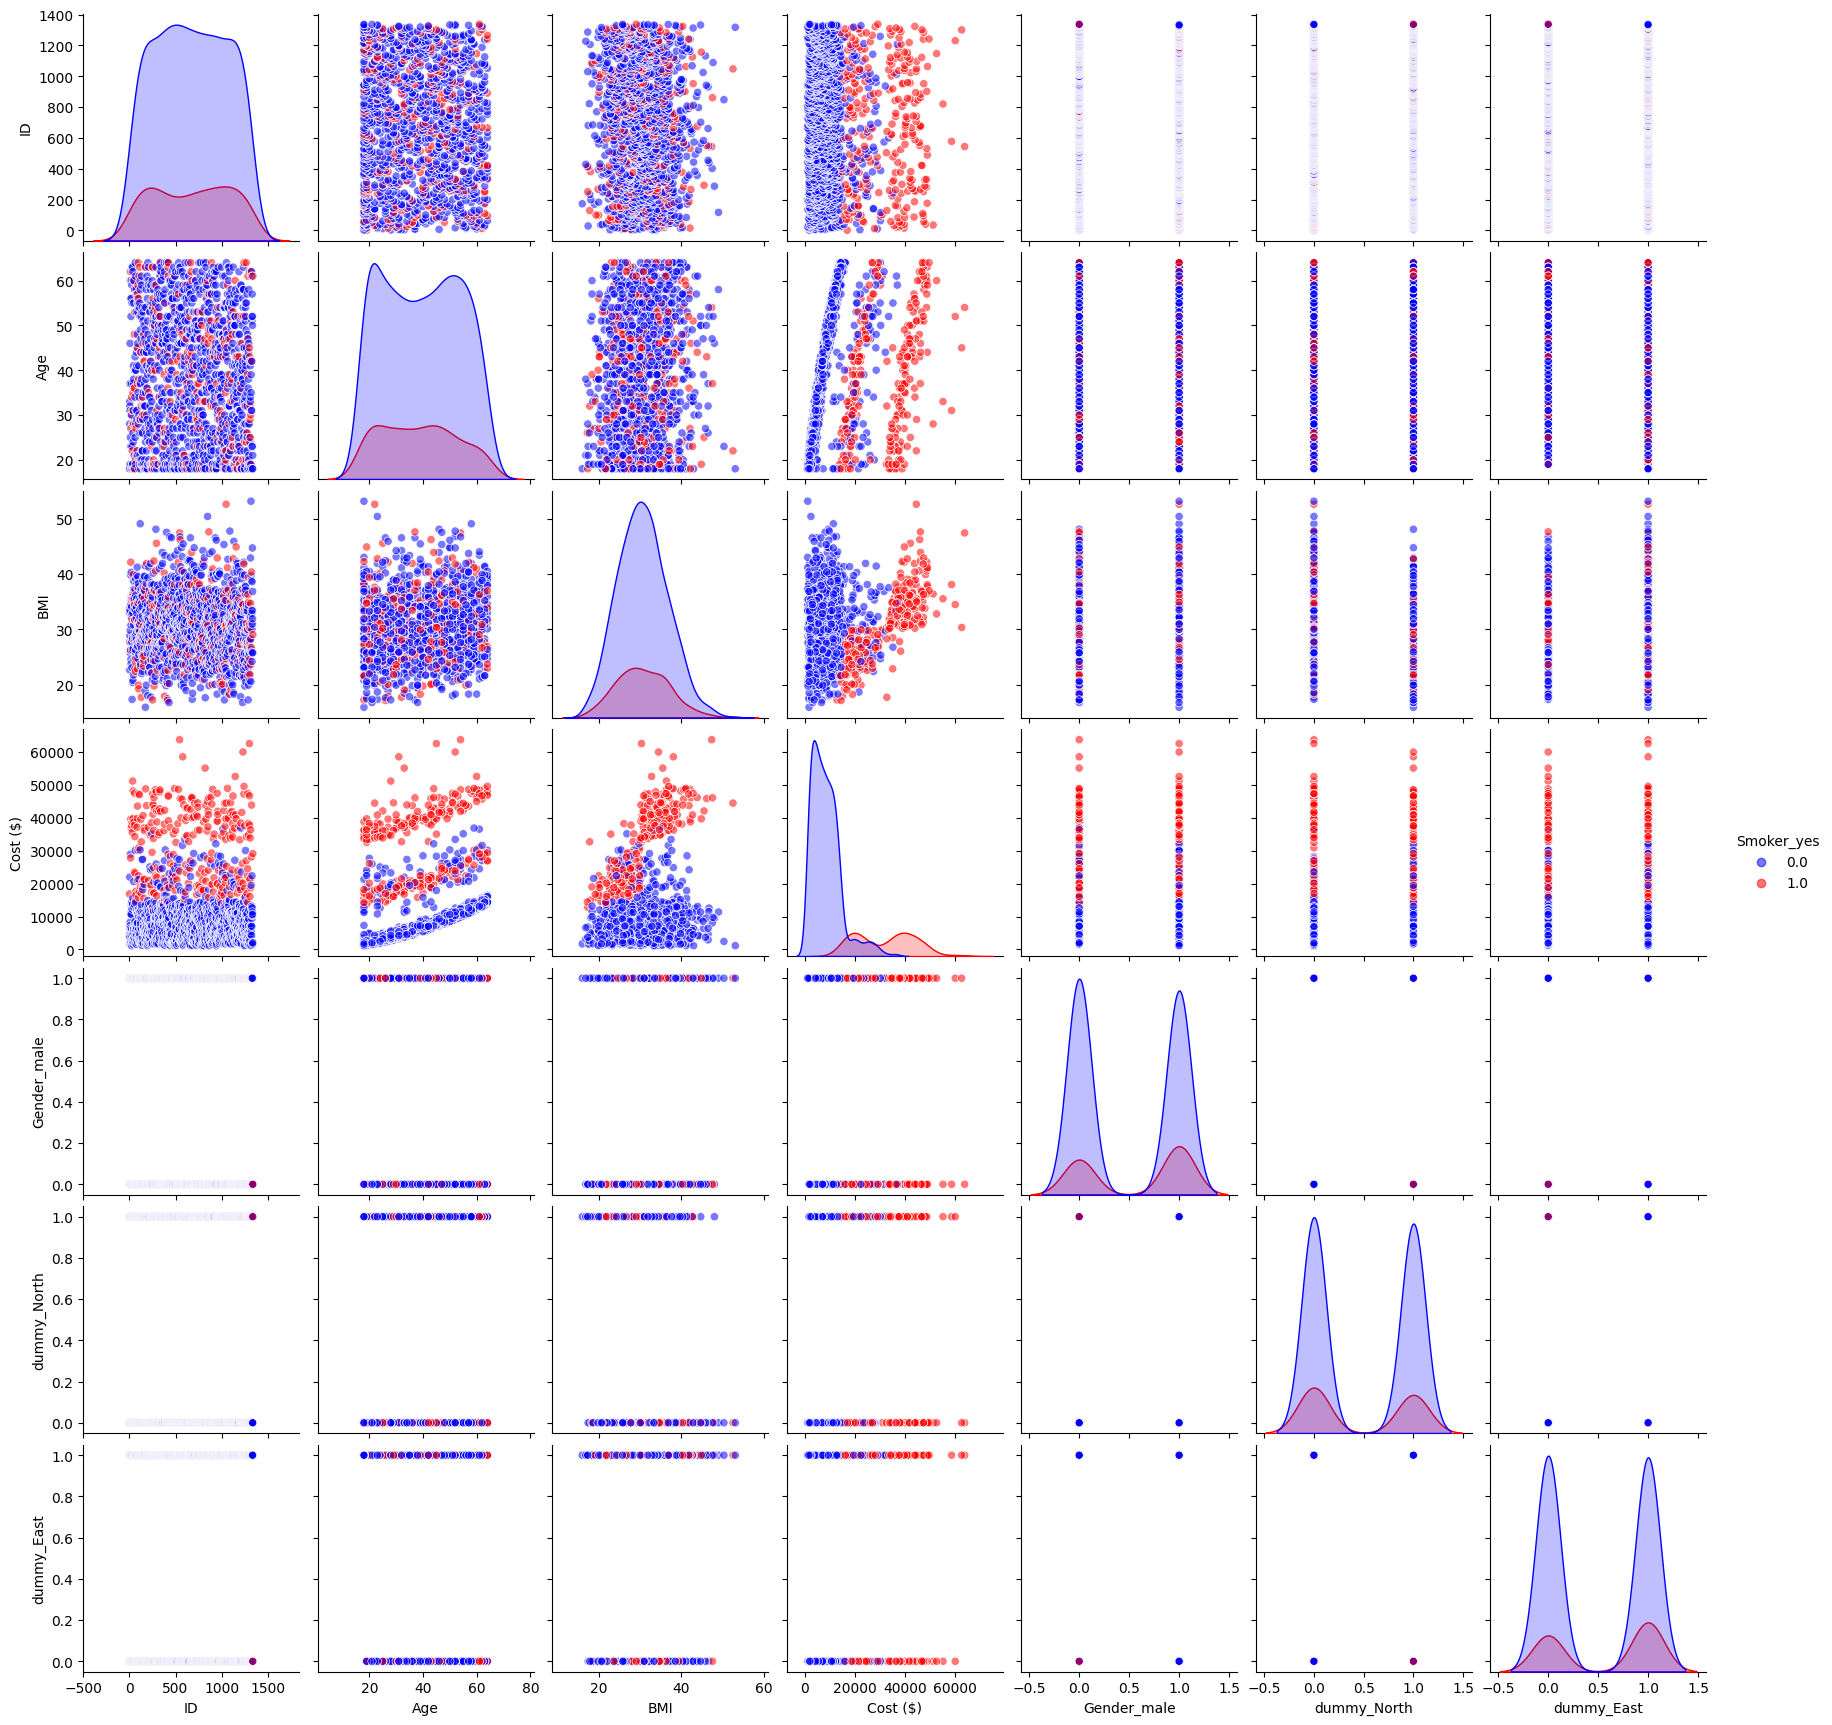

In [254]:
sns.pairplot(df_explore_preprocessed2, hue='Smoker_yes', palette=["#0000ff88", "#ff000088" ])
plt.show()